In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control

### PT3 process with PID controller

The process:

$$ P(s)=\frac{k}{(1+T_1s)(1+T_2s)(1+T_3s)} $$

the controller

$$ C(s) = Kp \left(1 + \frac{1}{T_i s} + T_D s \right) = \frac{K_p T_i s + K_p + K_p T_i T_D s^2}{T_i s} $$

In [2]:
# defining the parameters and transfer functions
k = 2
T1 = 1
T2 = 1
T3 = 1

Kp = 5
Ti = 20
TD = 0.2

# polynomials in the process
numP = k/T1/T2/T3
p = np.poly1d([-1/T1, -1/T2, -1/T3], r=True)
denP = p.coeffs

# polynomials in the controller
numC = [Kp*Ti*TD, Kp*Ti, Kp]
denC = [Ti, 0]

P = control.tf(numP, denP)
C = control.tf(numC, denC)

# the open loop and the closed loop
G0 = control.series(C, P)
G = control.feedback(G0)
G0


      40 s^2 + 200 s + 10
-------------------------------
20 s^4 + 60 s^3 + 60 s^2 + 20 s

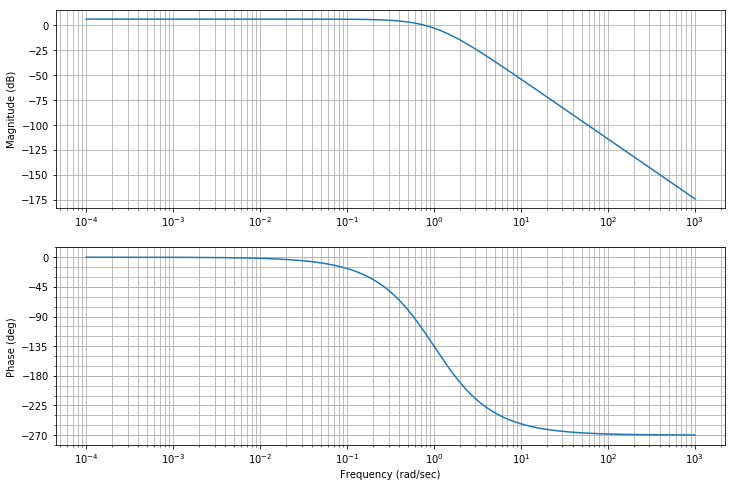

In [13]:
# Bode plot of the process
plt.figure(figsize=(12,8))
om = np.logspace(-4,3,1000)
Mag, Phase, omega = control.bode(P, om, dB=True)

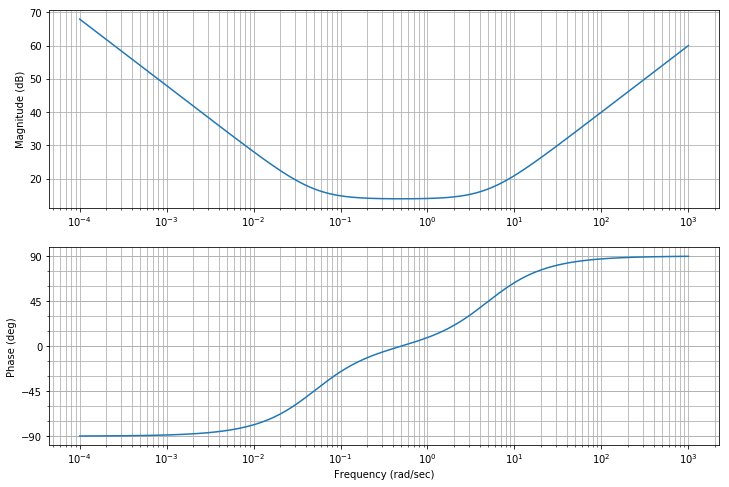

In [14]:
# Bode plot of the controller
plt.figure(figsize=(12,8))
om = np.logspace(-4,3,1000)
Mag, Phase, omega = control.bode(C, om, dB=True)

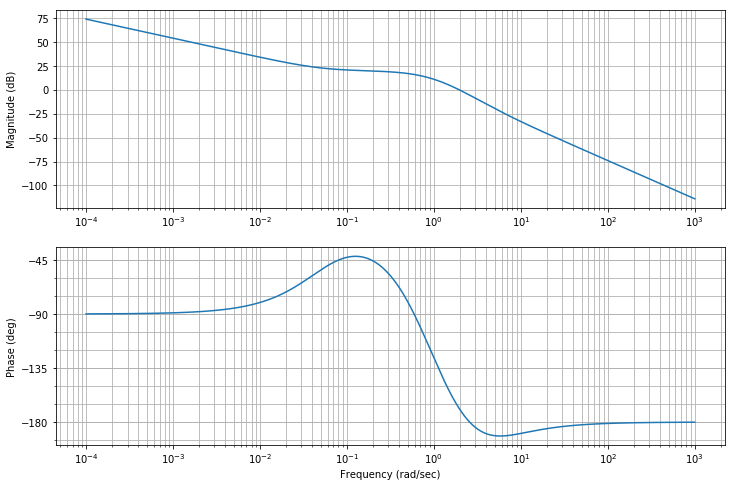

In [15]:
# Bode plot of the open loop
plt.figure(figsize=(12,8))
om = np.logspace(-4,3,1000)
Mag, Phase, omega = control.bode(G0, om,dB=True)

In [16]:
# stability margins
gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
gm_dB = 20*np.log10(gm)
gm_dB, pm

(5.543674583359918, 11.225747898872328)

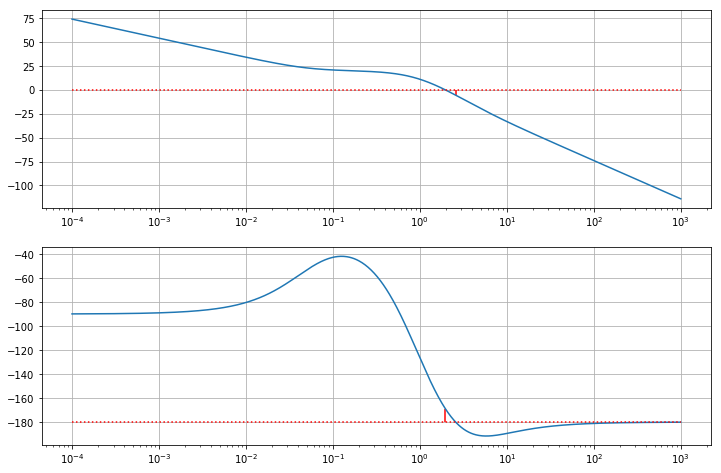

In [17]:
# plotting Bode with margin frequencies
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.semilogx(omega,20*np.log10(Mag)), plt.grid(True)
plt.semilogx(omega, 0*Mag,'r:')
plt.vlines(gc, -20*np.log10(gm), 0, colors='r')
plt.subplot(2,1,2)
plt.semilogx(omega,np.degrees(Phase)), plt.grid(True)
plt.semilogx(omega, 0*Phase - 180,'r:')
plt.vlines(pc, -180, -180 + pm, colors='r');

In [18]:
# time domain investigation
time = np.linspace(0,50,1000)
t, vt = control.step_response(G, time)

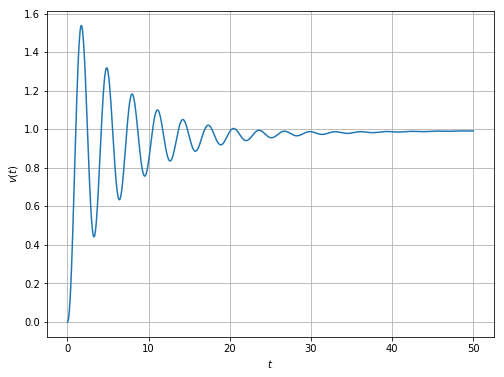

In [19]:
# plot the step response
plt.figure(figsize=(8,6))
plt.plot(t, vt), plt.grid(True), plt.xlabel('$t$'), plt.ylabel('$v(t)$');

In [20]:
# info on transient behavior
control.step_info(G)

{'RiseTime': 0.7549578998053077,
 'SettlingTime': 34.87905497100521,
 'SettlingMin': 0.44497804194338203,
 'SettlingMax': 1.5368499299140181,
 'Overshoot': 53.69650729635527,
 'Undershoot': 0.0,
 'Peak': 1.5368499299140181,
 'PeakTime': 1.6609073795716767,
 'SteadyStateValue': 0.9999250841469595}